In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score,explained_variance_score
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Flatten


2023-03-21 14:17:14.929935: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-21 14:17:14.929962: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
data = pd.read_csv('/home/gautam/Documents/project/RELIANCE.csv')
data.head(10)



,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN
5,2000-01-10,RELIANCE,EQ,314.55,317.40,318.70,305.30,306.65,308.50,312.35,13417057,4.190855e+14,NaN,NaN,NaN
6,2000-01-11,RELIANCE,EQ,308.50,307.95,310.95,283.85,288.50,288.50,296.40,12544322,3.718192e+14,NaN,NaN,NaN
7,2000-01-12,RELIANCE,EQ,288.50,289.00,305.00,282.15,304.70,301.70,294.57,12109507,3.567081e+14,NaN,NaN,NaN
8,2000-01-13,RELIANCE,EQ,301.70,306.00,316.40,304.10,309.75,311.85,311.79,17076042,5.324181e+14,NaN,NaN,NaN
9,2000-01-14,RELIANCE,EQ,311.85,309.50,321.65,309.50,317.00,316.30,316.17,13460592,4.255879e+14,NaN,NaN,NaN


In [3]:
data.dropna(axis = 0, inplace = True)


In [4]:
del data['Symbol']
data.shape


(2225, 14)

In [5]:
meta = data.copy()
meta['Date'] = pd.to_datetime(meta['Date'], format='%Y-%m-%d')
meta['Year'] = meta['Date'].dt.year
meta.head()


,Date,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Year
2850,2011-06-01,EQ,951.85,952.00,958.65,943.65,947.5,946.80,947.83,1838452,1.742538e+14,58630.0,901415.0,0.4903,2011
2851,2011-06-02,EQ,946.80,936.55,954.70,936.55,952.5,951.05,947.09,2152963,2.039039e+14,63061.0,1066759.0,0.4955,2011
2852,2011-06-03,EQ,951.05,960.50,967.00,931.50,936.0,934.60,951.69,4368279,4.157238e+14,128784.0,1035791.0,0.2371,2011
2853,2011-06-06,EQ,934.60,934.65,940.80,928.15,938.6,937.75,935.29,1405741,1.314771e+14,43384.0,476631.0,0.3391,2011
2854,2011-06-07,EQ,937.75,933.55,960.00,933.55,959.6,958.25,950.55,4025919,3.826839e+14,88703.0,2424958.0,0.6023,2011


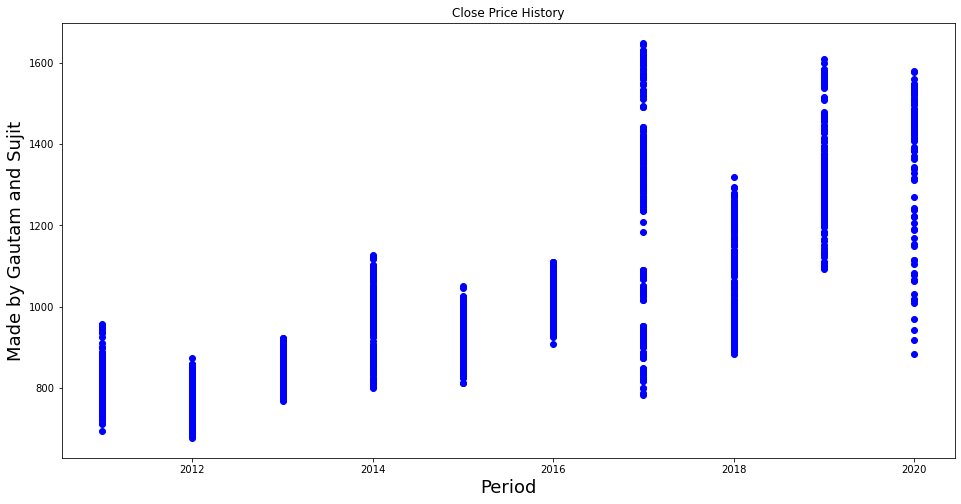

In [6]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.scatter(x = meta['Year'], y = meta['Close'], color = 'blue')
plt.xlabel('Period', fontsize=18)
plt.ylabel('Made by Gautam and Sujit', fontsize=18)
plt.show()

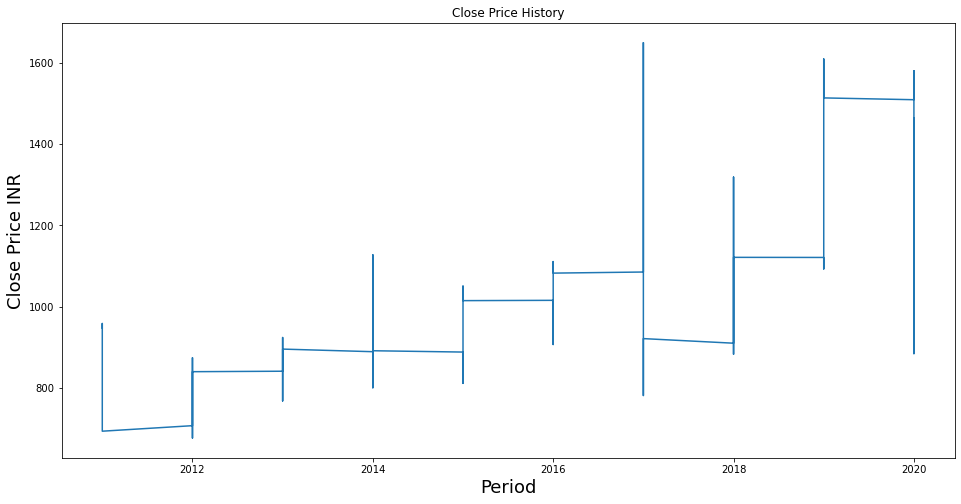

In [7]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(meta['Year'],meta['Close'])
plt.xlabel('Period', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.show()

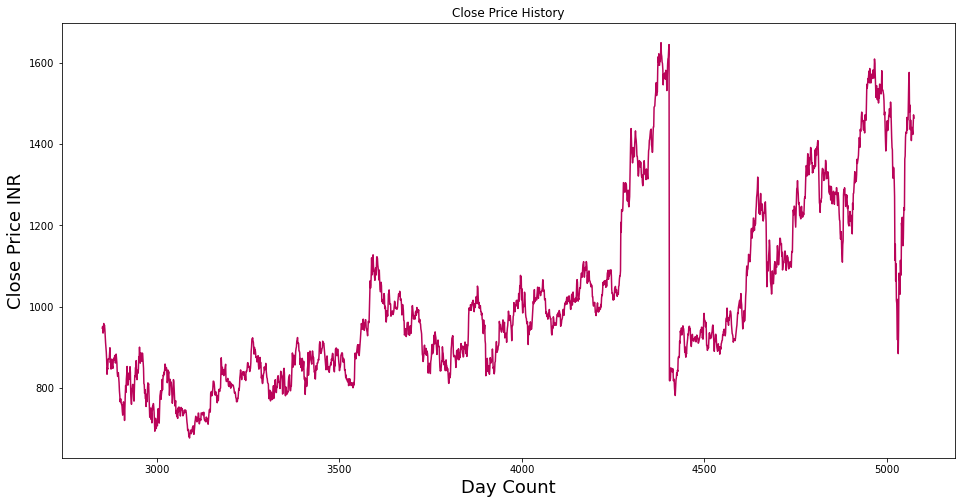

In [8]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(meta['Close'], color = '#ba0459')
plt.xlabel('Day Count', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.show()

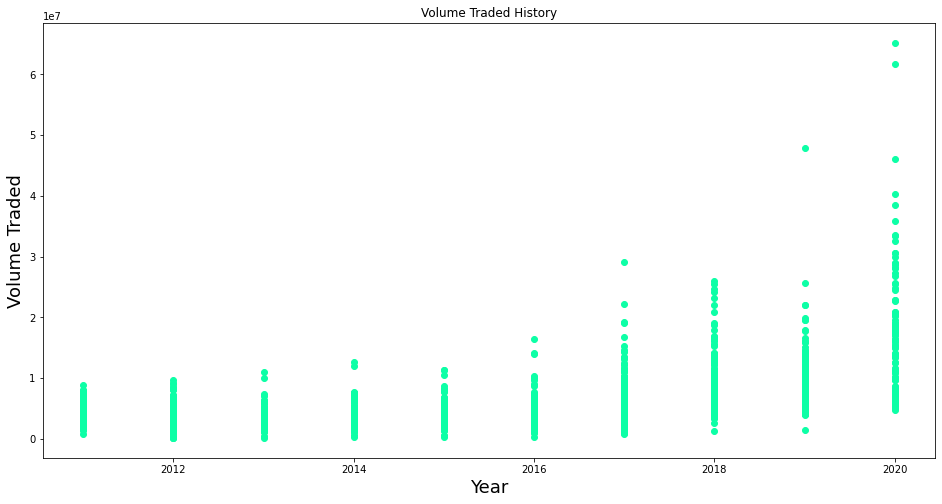

In [9]:
plt.figure(figsize=(16,8))
plt.title('Volume Traded History')
plt.scatter(x = meta['Year'], y = meta['Volume'], color = '#0dffa6')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Volume Traded', fontsize=18)
plt.show()

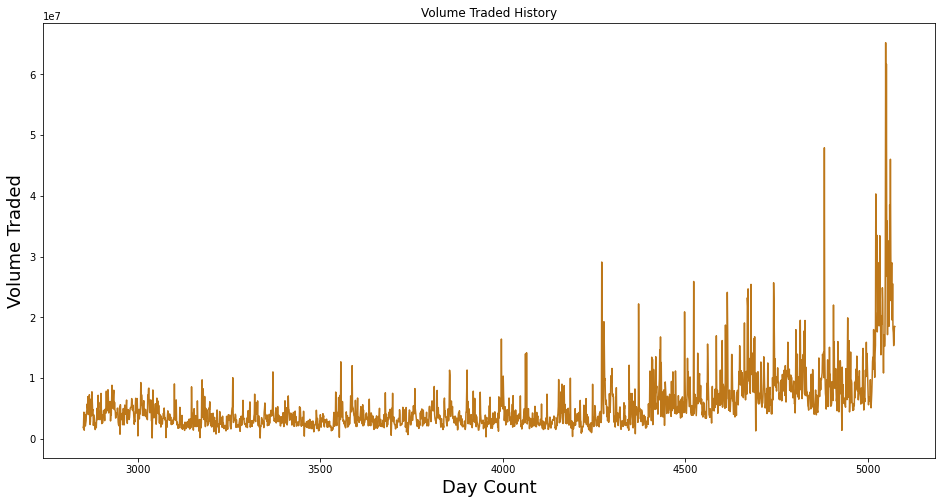

In [10]:
plt.figure(figsize=(16,8))
plt.title('Volume Traded History')
plt.plot(meta['Volume'], color = '#bd7719')
plt.xlabel('Day Count', fontsize=18)
plt.ylabel('Volume Traded', fontsize=18)
plt.show()

In [11]:
data.set_index('Date', inplace = True)
data.head()

,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,
2011-06-01,EQ,951.85,952.00,958.65,943.65,947.5,946.80,947.83,1838452,1.742538e+14,58630.0,901415.0,0.4903
2011-06-02,EQ,946.80,936.55,954.70,936.55,952.5,951.05,947.09,2152963,2.039039e+14,63061.0,1066759.0,0.4955
2011-06-03,EQ,951.05,960.50,967.00,931.50,936.0,934.60,951.69,4368279,4.157238e+14,128784.0,1035791.0,0.2371
2011-06-06,EQ,934.60,934.65,940.80,928.15,938.6,937.75,935.29,1405741,1.314771e+14,43384.0,476631.0,0.3391
2011-06-07,EQ,937.75,933.55,960.00,933.55,959.6,958.25,950.55,4025919,3.826839e+14,88703.0,2424958.0,0.6023


In [12]:
scaler = MinMaxScaler()
X = data[['Open', 'Low', 'High', 'Volume']].copy()
y = data['Close'].copy()

X[['Open', 'Low', 'High', 'Volume']] = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

In [13]:
def load_data(X, seq_len, train_size=0.65):
    amount_of_features = X.shape[1]
    X_mat = X.values
    sequence_length = seq_len + 1
    datanew = []
    
    for index in range(len(X_mat) - sequence_length):
        datanew.append(X_mat[index: index + sequence_length])
    
    datanew = np.array(datanew)
    train_split = int(round(train_size * datanew.shape[0]))
    train_data = datanew[:train_split, :]
    
    X_train = train_data[:, :-1]
    y_train = train_data[:, -1][:,-1]
    
    X_test = datanew[train_split:, :-1] 
    y_test = datanew[train_split:, -1][:,-1]

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], amount_of_features))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], amount_of_features))  

    return X_train, y_train, X_test, y_test

In [14]:
window = 22
X['close'] = y
X_train, y_train, X_test, y_test = load_data(X, window)
print(X_train.shape) 
print(y_train.shape) 
print(X_test.shape) 
print(y_test.shape)

(1431, 22, 5)
(1431,)
(771, 22, 5)
(771,)


In [15]:
model = Sequential()
model.add(LSTM(128, input_shape= (window, 5), return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(128, input_shape = (window, 5), return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(32))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, batch_size=1, validation_split = 0.1, epochs = 4)

2023-03-21 14:09:14.907881: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-21 14:09:14.907956: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-21 14:09:14.908010: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (prasad): /proc/driver/nvidia/version does not exist
2023-03-21 14:09:14.909049: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/4
1287/1287 [==============================] - 32s 22ms/step - loss: 0.0017 - val_loss: 0.0048
Epoch 2/4
1287/1287 [==============================] - 27s 21ms/step - loss: 9.2377e-04 - val_loss: 0.0027
Epoch 3/4
1287/1287 [==============================] - 30s 23ms/step - loss: 7.4808e-04 - val_loss: 6.9595e-04
Epoch 4/4
1287/1287 [==============================] - 28s 22ms/step - loss: 8.1247e-04 - val_loss: 0.0019


In [121]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([y_test])

trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore)) 
# mean_absolute_percentage_error (trainY[0], trainPredict[:,0])
print("Test data MAPE: ",mean_absolute_percentage_error(trainY[0], trainPredict[:,0]))
print("Test data R2 score:", r2_score(trainY[0], trainPredict[:,0]))
print("Test data explained variance regression score:", explained_variance_score(trainY[0], trainPredict[:,0]))


25/25 [==============================] - 0s 10ms/step
Train Score: 20.83 RMSE
Test Score: 59.37 RMSE
Test data MAPE:  0.017024053864308334
Test data R2 score: 0.9683551362164453
Test data explained variance regression score: 0.9689742936813652


In [124]:
plot_predicted = testPredict.copy()
plot_predicted = plot_predicted.reshape(771,1)
plot_actual = testY.copy()
plot_actual = plot_actual.reshape(771,1)

plot_predicted_train = trainPredict.copy()
plot_predicted_train = plot_predicted_train.reshape(1431,1)
plot_actual_train = trainY.copy()
plot_actual_train = plot_actual_train.reshape(1431,1)

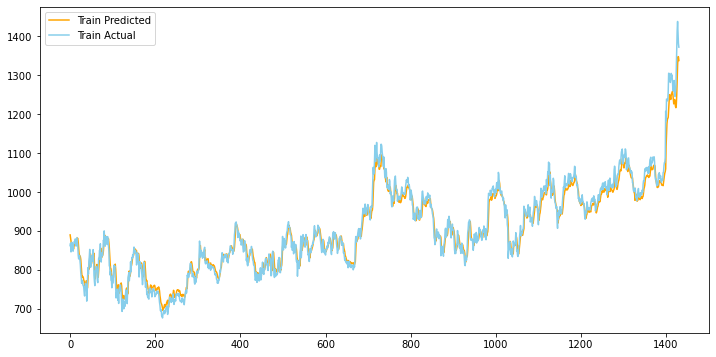

<Figure size 432x288 with 0 Axes>

In [125]:
plt.figure(figsize = (12,6))
plt.plot(pd.DataFrame(plot_predicted_train),color = 'orange', label='Train Predicted')
plt.plot(pd.DataFrame(plot_actual_train),color = 'skyblue', label='Train Actual')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.savefig('lstmHDFCT&T.png', dpi=150)
plt.show()
plt.draw()

/tmp/ipykernel_138393/1037793992.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


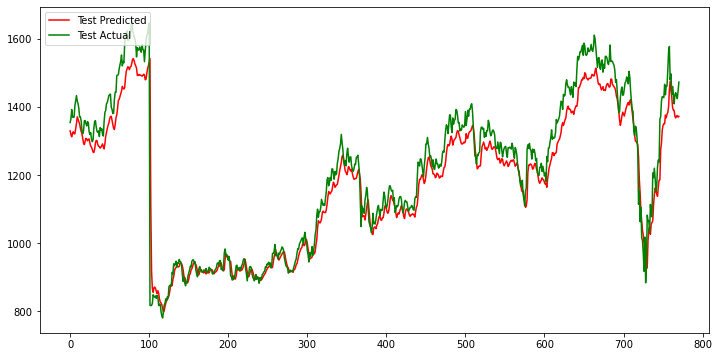

In [126]:
plt.figure(figsize = (12,6))
plt.plot(pd.DataFrame(plot_predicted), label='Test Predicted', color = 'red',)
plt.plot(pd.DataFrame(plot_actual), color = 'green', label='Test Actual')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.savefig('lstmHDFC.png', dpi=150)
fig.show()
